In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('max_columns', 200)
plt.style.use('ggplot')

In [54]:
html = pd.read_csv('../data/4_final_webpage_metadata.csv')

In [55]:
html

,entityid,yr_from_start,capture_yr,capture_m,file_path,file_exists,website_size_kb,careers,blog,login,contact,team,about,news,faq,call_to_action,testimonial,title,description,keywords,p_count,h_count,img_count,a_count,table_count,form_count,script_count,entityname,new_industrygroup,state,weburl,pb_companyid,startdate,lastVC,ownershipstatus,exit_date,has_exit,end_yr,start_yr,lifespan
0,100035,5.0,2001,9,data/html/100035/2001/09/index.html,1,1.793945,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,Tesaria,Information Technology,CA,www.tesaria.com,NaN,1997-02-01,2000-06-30,Out of Business,NaN,0,2023.0,1997.0,26.0
1,100035,5.0,2002,1,data/html/100035/2002/01/index.html,1,1.791016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,Tesaria,Information Technology,CA,www.tesaria.com,NaN,1997-02-01,2000-06-30,Out of Business,NaN,0,2023.0,1997.0,26.0
2,100035,5.5,2002,7,data/html/100035/2002/07/index.html,1,9.054688,1,0,0,1,0,0,1,0,0,0,1,1,1,6,0,23,23,7,0,3,Tesaria,Information Technology,CA,www.tesaria.com,NaN,1997-02-01,2000-06-30,Out of Business,NaN,0,2023.0,1997.0,26.0
3,100035,6.0,2002,9,data/html/100035/2002/09/index.html,1,9.054688,1,0,0,1,0,0,1,0,0,0,1,1,1,6,0,23,23,7,0,3,Tesaria,Information Technology,CA,www.tesaria.com,NaN,1997-02-01,2000-06-30,Out of Business,NaN,0,2023.0,1997.0,26.0
4,100035,15.5,2012,8,data/html/100035/2012/08/index.html,1,0.032227,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Tesaria,Information Technology,CA,www.tesaria.com,NaN,1997-02-01,2000-06-30,Out of Business,NaN,0,2023.0,1997.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830492,728936,0.0,2021,9,data/html/728936/2021/09/index.html,1,609.729492,0,0,0,1,0,1,1,0,1,0,1,1,0,45,16,16,51,0,1,51,Truthset Inc.,Information Technology,CA,www.truthset.io,338510-53,NaN,2022-03-22,Private & Independent,NaN,0,2023.0,2022.0,1.0
830493,728936,0.0,2022,2,data/html/728936/2022/02/index.html,1,651.221680,0,0,0,1,0,1,1,0,1,0,1,1,0,45,12,17,54,0,1,52,Truthset Inc.,Information Technology,CA,www.truthset.io,338510-53,NaN,2022-03-22,Private & Independent,NaN,0,2023.0,2022.0,1.0
830494,728936,1.0,2022,9,data/html/728936/2022/09/index.html,1,570.644531,0,0,0,1,0,1,1,0,1,0,1,1,0,38,16,8,49,0,1,49,Truthset Inc.,Information Technology,CA,www.truthset.io,338510-53,NaN,2022-03-22,Private & Independent,NaN,0,2023.0,2022.0,1.0
830495,728936,1.5,2023,5,data/html/728936/2023/05/index.html,1,596.093750,0,0,0,1,0,1,1,0,1,0,1,1,0,37,17,9,50,0,1,46,Truthset Inc.,Information Technology,CA,www.truthset.io,338510-53,NaN,2022-03-22,Private & Independent,NaN,0,2023.0,2022.0,1.0


In [59]:
html.groupby('ownershipstatus')['has_exit'].mean()

ownershipstatus
Acquired/Merged          0.774632
Assets Acquired          0.958459
In Bankruptcy            0.000000
In IPO Registration      0.214156
Out of Business          0.005005
Private & Independent    0.064609
Publicly-held            0.857652
Name: has_exit, dtype: float64

In [17]:
html.new_industrygroup.value_counts()

Information Technology             292437
Business and Financial Services    169909
Healthcare                         142665
Consumer Services                  123013
Consumer Goods                      54312
Industrial Goods and Materials      32076
Energy and Utilities                15183
To Be Assigned                        706
Name: new_industrygroup, dtype: int64

In [62]:
pub_cols = ['careers', 'blog', 'login', 'contact',
       'team', 'about', 'news', 'faq', 'call_to_action', 'testimonial']
html["publicity_score"] = (html[pub_cols].sum(axis=1) / 9)

In [29]:
html.groupby("new_industrygroup")["publicity_score"].mean()

new_industrygroup
Business and Financial Services    0.495155
Consumer Goods                     0.472075
Consumer Services                  0.468529
Energy and Utilities               0.406573
Healthcare                         0.404425
Industrial Goods and Materials     0.401411
Information Technology             0.454916
To Be Assigned                     0.221435
Name: publicity_score, dtype: float64

In [34]:
html.dropna(subset=['new_industrygroup'], inplace=True)

In [122]:
# What are we controlling for?
# Lifespan within 7 years
# Startdate of 2017
s7 = html[(html.lifespan <= 7) & (html.ownershipstatus.isin(["Acquired/Merged", "Publicly-held"])) & (html.start_yr == 2016.0)] # Public of Acquired (successes)
f7 = html[(html.lifespan <= 7) & (html.ownershipstatus == "Private & Independent") & (html.start_yr == 2016.0)] # Still private (potential failures)

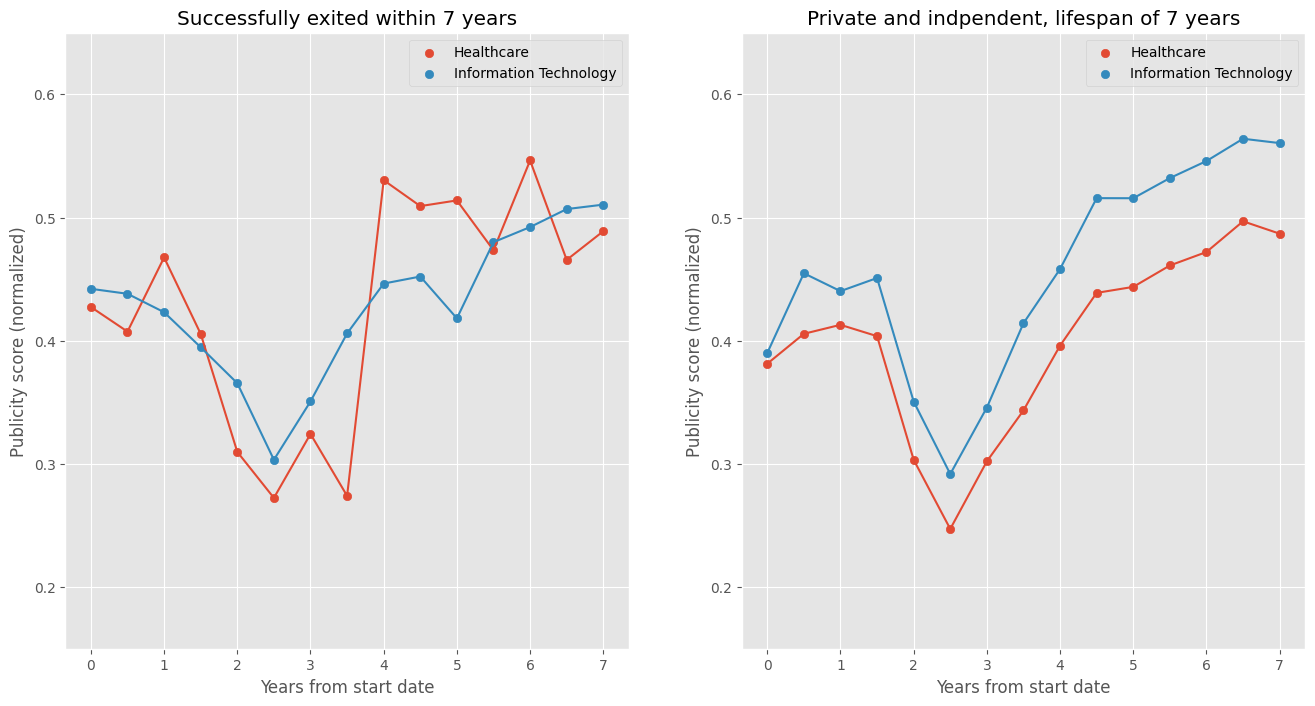

In [123]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
industries = ["Healthcare", "Information Technology"]
for x in industries:
    sdata = s7[s7.new_industrygroup == x].groupby('yr_from_start')['publicity_score'].mean()[0:7]
    ax1.scatter(sdata.index, sdata, label=x)
    ax1.plot(sdata.index, sdata)
    
    fdata = f7[f7.new_industrygroup == x].groupby('yr_from_start')['publicity_score'].mean()[0:7]
    ax2.scatter(fdata.index, fdata, label=x)
    ax2.plot(fdata.index, fdata)

    
ax1.set_xlabel("Years from start date")
ax2.set_xlabel("Years from start date")
    
ax1.set_ylabel("Publicity score (normalized)")
ax2.set_ylabel("Publicity score (normalized)")
    
ax1.set_title("Successfully exited within 7 years")
ax2.set_title("Private and indpendent, lifespan of 7 years")
    
ax1.set_ylim([0.15, 0.65])
ax2.set_ylim([0.15, 0.65])
    
ax1.legend()
ax2.legend()
plt.show()

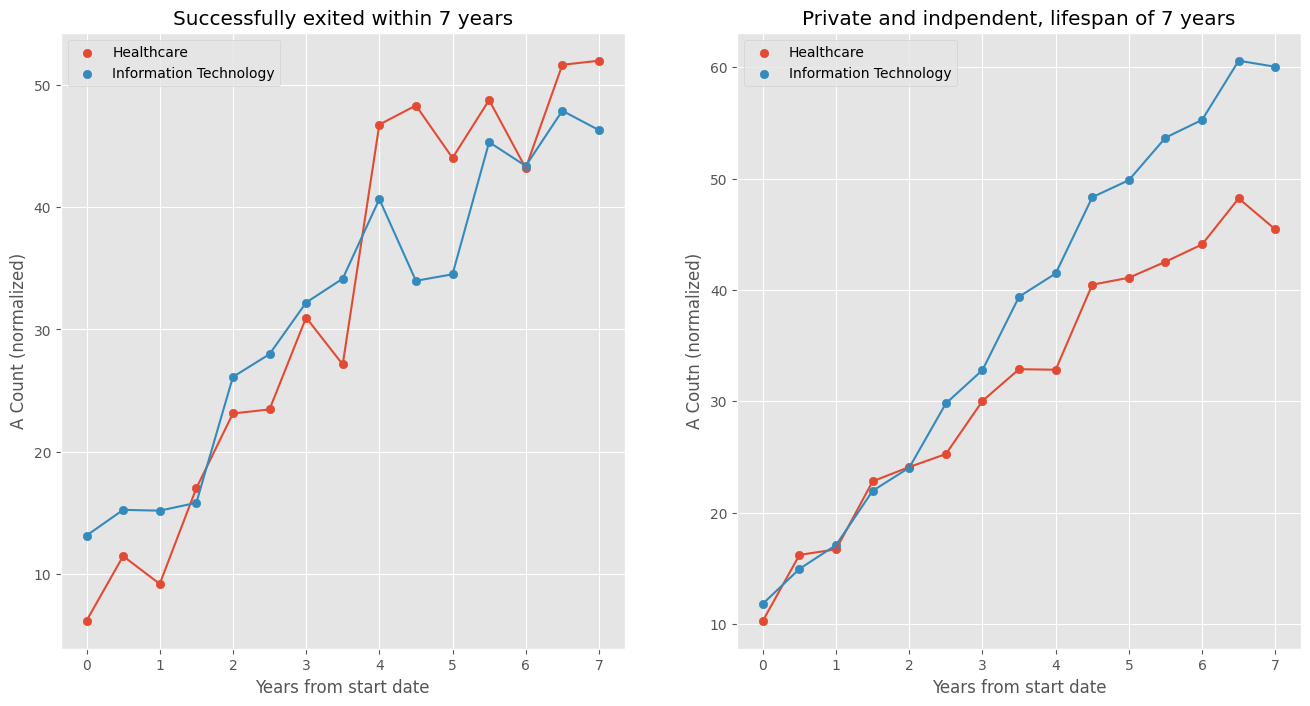

In [125]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
industries = ["Healthcare", "Information Technology"]
for x in industries:
    sdata = s7[s7.new_industrygroup == x].groupby('yr_from_start')['a_count'].mean()[0:7]
    ax1.scatter(sdata.index, sdata, label=x)
    ax1.plot(sdata.index, sdata)
    
    fdata = f7[f7.new_industrygroup == x].groupby('yr_from_start')['a_count'].mean()[0:7]
    ax2.scatter(fdata.index, fdata, label=x)
    ax2.plot(fdata.index, fdata)

    
ax1.set_xlabel("Years from start date")
ax2.set_xlabel("Years from start date")
    
ax1.set_ylabel("A Count (normalized)")
ax2.set_ylabel("A Coutn (normalized)")
    
ax1.set_title("Successfully exited within 7 years")
ax2.set_title("Private and indpendent, lifespan of 7 years")
    
# ax1.set_ylim([0.15, 0.65])
# ax2.set_ylim([0.15, 0.65])
    
ax1.legend()
ax2.legend()
plt.show()